In [6]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
coordinates=list(lat_lngs)

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities

['marzuq',
 'tautira',
 'mar del plata',
 'elliot',
 'ponta do sol',
 'steinbach',
 'wanning',
 'lompoc',
 'karratha',
 'yellowknife',
 'kaupanger',
 'hermanus',
 'ushuaia',
 'katsuura',
 'namibe',
 'plettenberg bay',
 'tsihombe',
 'busselton',
 'azatamut',
 'rikitea',
 'stromness',
 'salalah',
 'mataura',
 'abbeville',
 'new norfolk',
 'punta arenas',
 'tiarei',
 'narsaq',
 'vilhena',
 'butaritari',
 'athlone',
 'rivers',
 'manokwari',
 'varkkallai',
 'taolanaro',
 'saldanha',
 'saint george',
 'albany',
 'airai',
 'honiara',
 'sentyabrskiy',
 'sabang',
 'ternate',
 'te anau',
 'bereda',
 'hobart',
 'santa rosa',
 'castro',
 'rundu',
 'kotka',
 'bredasdorp',
 'saint-philippe',
 'upernavik',
 'kachiry',
 'port lincoln',
 'maragogi',
 'thompson',
 'hambantota',
 'tura',
 'hajnowka',
 'hilo',
 'avarua',
 'avera',
 'cabo san lucas',
 'arraial do cabo',
 'lagoa',
 'khandyga',
 'grand-lahou',
 'longyearbyen',
 'kasongo-lunda',
 'hami',
 'caravelas',
 'puerto escondido',
 'vaini',
 'anloga',

In [17]:
# import datetime library and time library
import time
from datetime import datetime
import requests
import config

weather_api_key = config.weather_api_key
#print(weather_api_key)
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key
#print(url)

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all ythe cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marzuq
Processing Record 2 of Set 1 | tautira
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | elliot
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | steinbach
Processing Record 7 of Set 1 | wanning
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | kaupanger
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | plettenberg bay
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | azatamut
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | stromness
Processing Record 22 of Set 1 | salalah
Processin

Processing Record 38 of Set 4 | rocha
Processing Record 39 of Set 4 | pevek
Processing Record 40 of Set 4 | dunedin
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | umm kaddadah
Processing Record 44 of Set 4 | bonthe
Processing Record 45 of Set 4 | olinda
Processing Record 46 of Set 4 | oktyabrskoye
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | haileybury
Processing Record 49 of Set 4 | tongzi
Processing Record 50 of Set 4 | zhigalovo
Processing Record 1 of Set 5 | huanan
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | alta floresta
Processing Record 7 of Set 5 | yumen
Processing Record 8 of Set 5 | ust-kuyga
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 | bluff
Processi

Processing Record 26 of Set 8 | san martin
Processing Record 27 of Set 8 | esperance
Processing Record 28 of Set 8 | kudahuvadhoo
Processing Record 29 of Set 8 | biloela
Processing Record 30 of Set 8 | kalomo
City not found. Skipping...
Processing Record 31 of Set 8 | cabedelo
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | sorvag
City not found. Skipping...
Processing Record 34 of Set 8 | torbay
Processing Record 35 of Set 8 | kloulklubed
Processing Record 36 of Set 8 | ramsar
Processing Record 37 of Set 8 | iacobeni
Processing Record 38 of Set 8 | damoh
Processing Record 39 of Set 8 | barcelos
Processing Record 40 of Set 8 | talaya
Processing Record 41 of Set 8 | sayyan
Processing Record 42 of Set 8 | mishan
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | semnan
Processing Record 45 of Set 8 | syracuse
Processing Record 46 of Set 8 | arvika
Processing Record 47 of Set 8 | smolenka
Processing Record 48 of Set 8 | stoyba
City not found

Processing Record 12 of Set 12 | marathon
Processing Record 13 of Set 12 | marsa matruh
Processing Record 14 of Set 12 | the valley
Processing Record 15 of Set 12 | berdigestyakh
Processing Record 16 of Set 12 | khabary
Processing Record 17 of Set 12 | kalmar
Processing Record 18 of Set 12 | morant bay
Processing Record 19 of Set 12 | tsabong
Processing Record 20 of Set 12 | bardsir
Processing Record 21 of Set 12 | aswan
Processing Record 22 of Set 12 | xiongzhou
Processing Record 23 of Set 12 | batticaloa
Processing Record 24 of Set 12 | falealupo
City not found. Skipping...
Processing Record 25 of Set 12 | moerai
Processing Record 26 of Set 12 | bembereke
Processing Record 27 of Set 12 | olafsvik
Processing Record 28 of Set 12 | praya
Processing Record 29 of Set 12 | raudeberg
Processing Record 30 of Set 12 | marsaxlokk
Processing Record 31 of Set 12 | tsaratanana
Processing Record 32 of Set 12 | esna
Processing Record 33 of Set 12 | tabukiniberu
City not found. Skipping...
Processin

In [20]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marzuq,14.4000,46.4667,15.20,74,97,1.95,YE,2021-12-21 01:28:30
1,Tautira,-17.7333,-149.1500,29.01,73,19,2.28,PF,2021-12-21 01:28:31
2,Mar Del Plata,-38.0023,-57.5575,19.49,83,75,1.34,AR,2021-12-21 01:28:31
3,Elliot,-31.3333,27.8500,12.53,79,100,1.69,ZA,2021-12-21 01:28:31
4,Ponta Do Sol,32.6667,-17.1000,21.11,93,100,9.30,PT,2021-12-21 01:28:32
5,Steinbach,50.1667,8.5667,0.66,80,0,1.54,DE,2021-12-21 01:28:32
6,Wanning,18.8003,110.3967,18.62,87,99,5.16,CN,2021-12-21 01:28:32
7,Lompoc,34.6391,-120.4579,12.17,77,90,3.58,US,2021-12-21 01:26:05
8,Karratha,-20.7377,116.8463,32.81,48,5,4.30,AU,2021-12-21 01:28:33
9,Yellowknife,62.4560,-114.3525,-35.40,78,1,2.06,CA,2021-12-21 01:28:33


<AxesSubplot:>

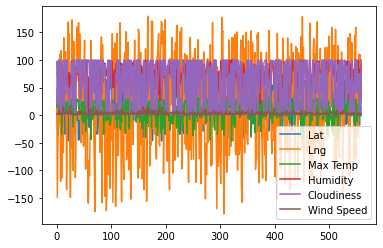

In [21]:
city_data_df.plot()